In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\Badr\Desktop\\PROGRAMING\\PYTHON\\LESSONS\\Machine Learning Models(MLM)\\PROJECT\\Cars Datasets 2025.csv", encoding='latin1')

In [3]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5,100 - 140 Nm
1,TOYOTA,GR SUPRA,I4,"2,998 cc",382 hp,250 km/h,4.1 sec,53900.0,Petrol,2,500 Nm
2,TOYOTA,TOYOTA 86,BOXER-4,"1,998 cc",205 hp,226 km/h,6.4 sec,27000.0,Petrol,2+2,205 Nm
3,TOYOTA,TOYOTA GR86,BOXER-4,"2,387 cc",228 hp,226 km/h,5.6 sec,30000.0,Petrol,4,250 Nm
4,TOYOTA,TOYOTA LAND CRUISER,V8,"5,663 cc",381 hp,220 km/h,6.7 sec,85000.0,Diesel,7,500 Nm


In [4]:
df.shape

(1066, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1066 non-null   object 
 1   Cars Names                 1066 non-null   object 
 2   Engines                    1066 non-null   object 
 3   CC/Battery Capacity        1066 non-null   object 
 4   HorsePower                 1066 non-null   object 
 5   Total Speed                1066 non-null   object 
 6   Performance(0 - 100 )KM/H  1066 non-null   object 
 7   Cars Prices                1066 non-null   float64
 8   Fuel Types                 1066 non-null   object 
 9   Seats                      1066 non-null   object 
 10  Torque                     1066 non-null   object 
dtypes: float64(1), object(10)
memory usage: 91.7+ KB


In [6]:
df['Fuel Types'].unique()

array(['Petrol', 'Diesel', 'Electric', 'Petrol/Diesel', 'Plug-in Hybrid',
       'Petrol/AWD', 'Hybrid', 'Petrol/Hybrid', 'Hydrogen',
       'Diesel/Petrol', 'Petrol/EV', 'Hybrid/Electric', 'Petrol, Hybrid',
       'Petrol, Diesel', 'Hybrid (Petrol)', 'CNG/Petrol', 'Hybrid/Petrol'],
      dtype=object)

In [7]:
import re

# Function to clean and extract numeric average from CC/Battery Capacity
def clean_capacity(cell):
    if not isinstance(cell, str):
        return np.nan
    numbers = re.findall(r'\d+(?:\.\d+)?', cell.replace(",", ""))
    numbers = [float(num) for num in numbers]
    return sum(numbers) / len(numbers) if numbers else np.nan

# Apply the function to create a new cleaned column
df['Cleaned Capacity'] = df['CC/Battery Capacity'].apply(clean_capacity)

In [8]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Cleaned Capacity
0,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5,100 - 140 Nm,1200.0
1,TOYOTA,GR SUPRA,I4,"2,998 cc",382 hp,250 km/h,4.1 sec,53900.0,Petrol,2,500 Nm,2998.0
2,TOYOTA,TOYOTA 86,BOXER-4,"1,998 cc",205 hp,226 km/h,6.4 sec,27000.0,Petrol,2+2,205 Nm,1998.0
3,TOYOTA,TOYOTA GR86,BOXER-4,"2,387 cc",228 hp,226 km/h,5.6 sec,30000.0,Petrol,4,250 Nm,2387.0
4,TOYOTA,TOYOTA LAND CRUISER,V8,"5,663 cc",381 hp,220 km/h,6.7 sec,85000.0,Diesel,7,500 Nm,5663.0


In [9]:
def clean_numeric_cell(cell):
    if pd.isnull(cell):
        return np.nan
    cell = str(cell).replace(",", "")
    numbers = re.findall(r'\d+(?:\.\d+)?', cell)
    numbers = [float(num) for num in numbers]
    return sum(numbers) / len(numbers) if numbers else np.nan

# List of columns to clean
columns_to_clean = [
    'HorsePower',
    'Total Speed',
    'Performance(0 - 100 )KM/H',
    'Cars Prices',
    'Seats',
    'Torque'
]

# Apply the function to each column
for col in columns_to_clean:
    df[col] = df[col].apply(clean_numeric_cell)

# Save cleaned file (optional)
df.to_csv("Cars_Dataset_Cleaned.csv", index=False)

In [10]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Cleaned Capacity
0,Ford,KA+,1.2L Petrol,"1,200 cc",77.5,165.0,10.5,13500.0,Petrol,5.0,120.0,1200.0
1,TOYOTA,GR SUPRA,I4,"2,998 cc",382.0,250.0,4.1,53900.0,Petrol,2.0,500.0,2998.0
2,TOYOTA,TOYOTA 86,BOXER-4,"1,998 cc",205.0,226.0,6.4,27000.0,Petrol,2.0,205.0,1998.0
3,TOYOTA,TOYOTA GR86,BOXER-4,"2,387 cc",228.0,226.0,5.6,30000.0,Petrol,4.0,250.0,2387.0
4,TOYOTA,TOYOTA LAND CRUISER,V8,"5,663 cc",381.0,220.0,6.7,85000.0,Diesel,7.0,500.0,5663.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1066 non-null   object 
 1   Cars Names                 1066 non-null   object 
 2   Engines                    1066 non-null   object 
 3   CC/Battery Capacity        1066 non-null   object 
 4   HorsePower                 1066 non-null   float64
 5   Total Speed                1066 non-null   float64
 6   Performance(0 - 100 )KM/H  1066 non-null   float64
 7   Cars Prices                1066 non-null   float64
 8   Fuel Types                 1066 non-null   object 
 9   Seats                      1066 non-null   float64
 10  Torque                     1066 non-null   float64
 11  Cleaned Capacity           1064 non-null   float64
dtypes: float64(7), object(5)
memory usage: 100.1+ KB


In [12]:
df['Seats'] = df['Seats'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1066 non-null   object 
 1   Cars Names                 1066 non-null   object 
 2   Engines                    1066 non-null   object 
 3   CC/Battery Capacity        1066 non-null   object 
 4   HorsePower                 1066 non-null   float64
 5   Total Speed                1066 non-null   float64
 6   Performance(0 - 100 )KM/H  1066 non-null   float64
 7   Cars Prices                1066 non-null   float64
 8   Fuel Types                 1066 non-null   object 
 9   Seats                      1066 non-null   int64  
 10  Torque                     1066 non-null   float64
 11  Cleaned Capacity           1064 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 100.1+ KB


In [14]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['int64', 'float64'])

cat_col = cat_df.columns.tolist()
num_col = num_df.columns.tolist()

In [15]:
len(num_col)

7

In [16]:
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
Cleaned Capacity             2
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

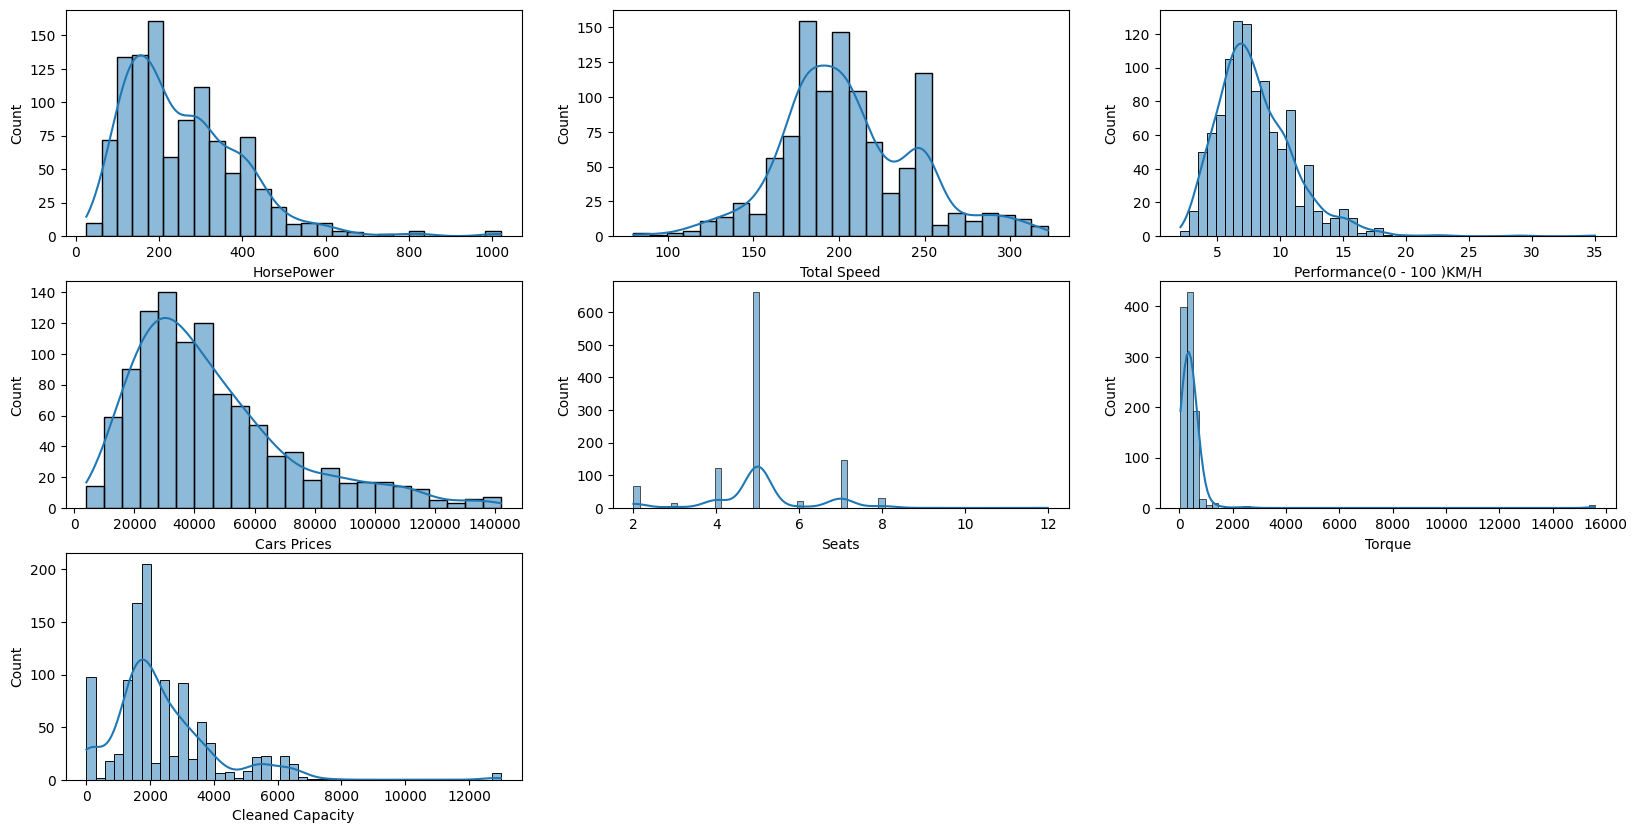

In [19]:
plt.figure(figsize=(20,10))

for index,col in enumerate(num_col):
    plt.subplot(3,3,index+1)
    sns.histplot(data=df, x=col, kde=True)
plt.show()

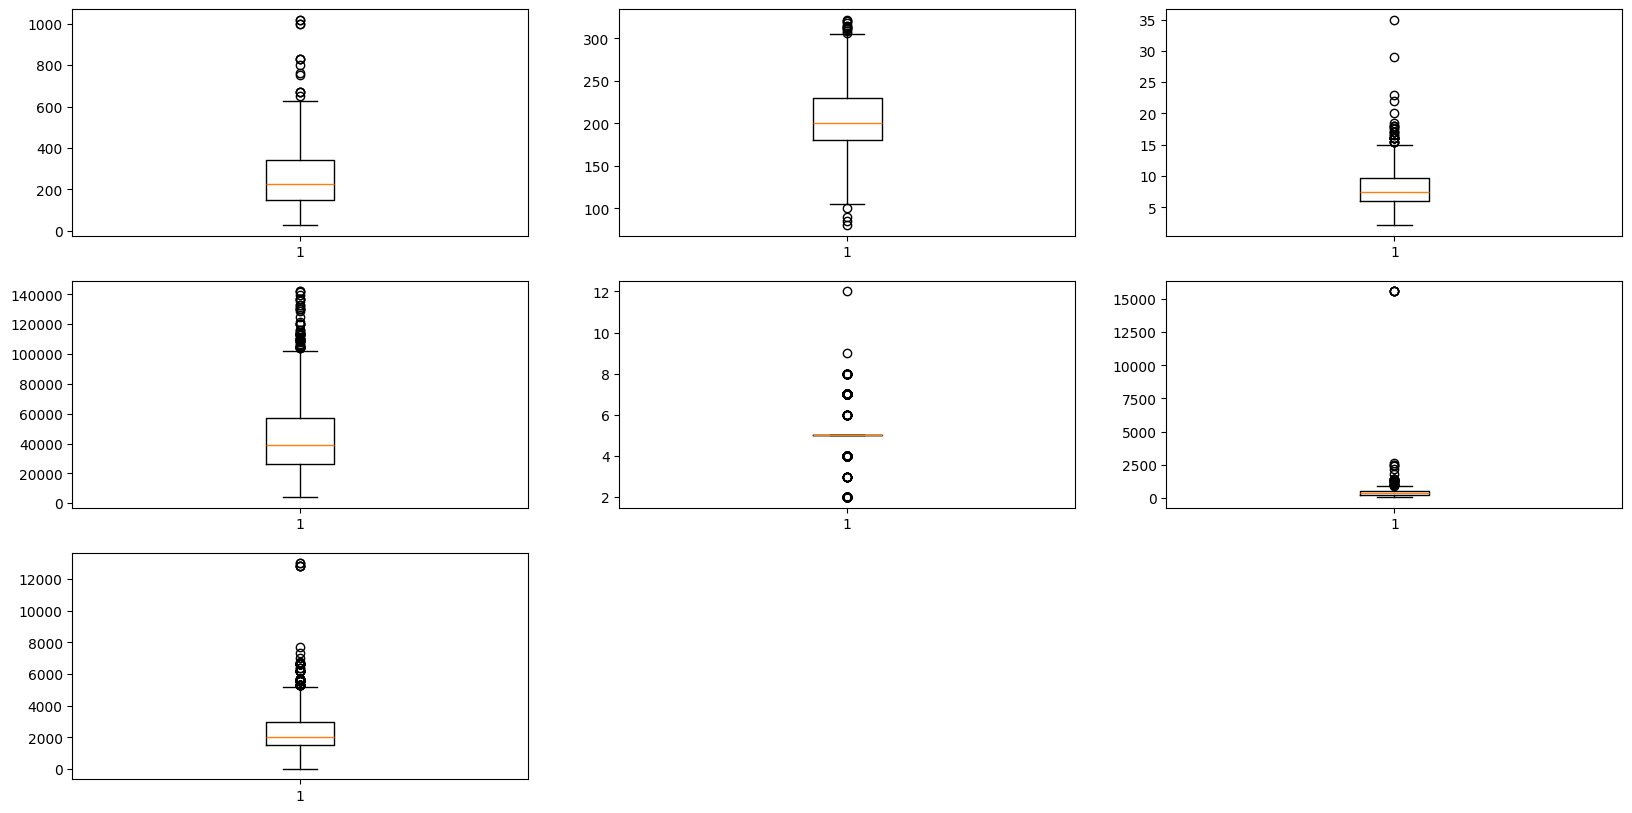

In [20]:
plt.figure(figsize=(20,10))

for index,col in enumerate(num_col):
    plt.subplot(3,3,index+1)
    plt.boxplot(df[col])
plt.show()

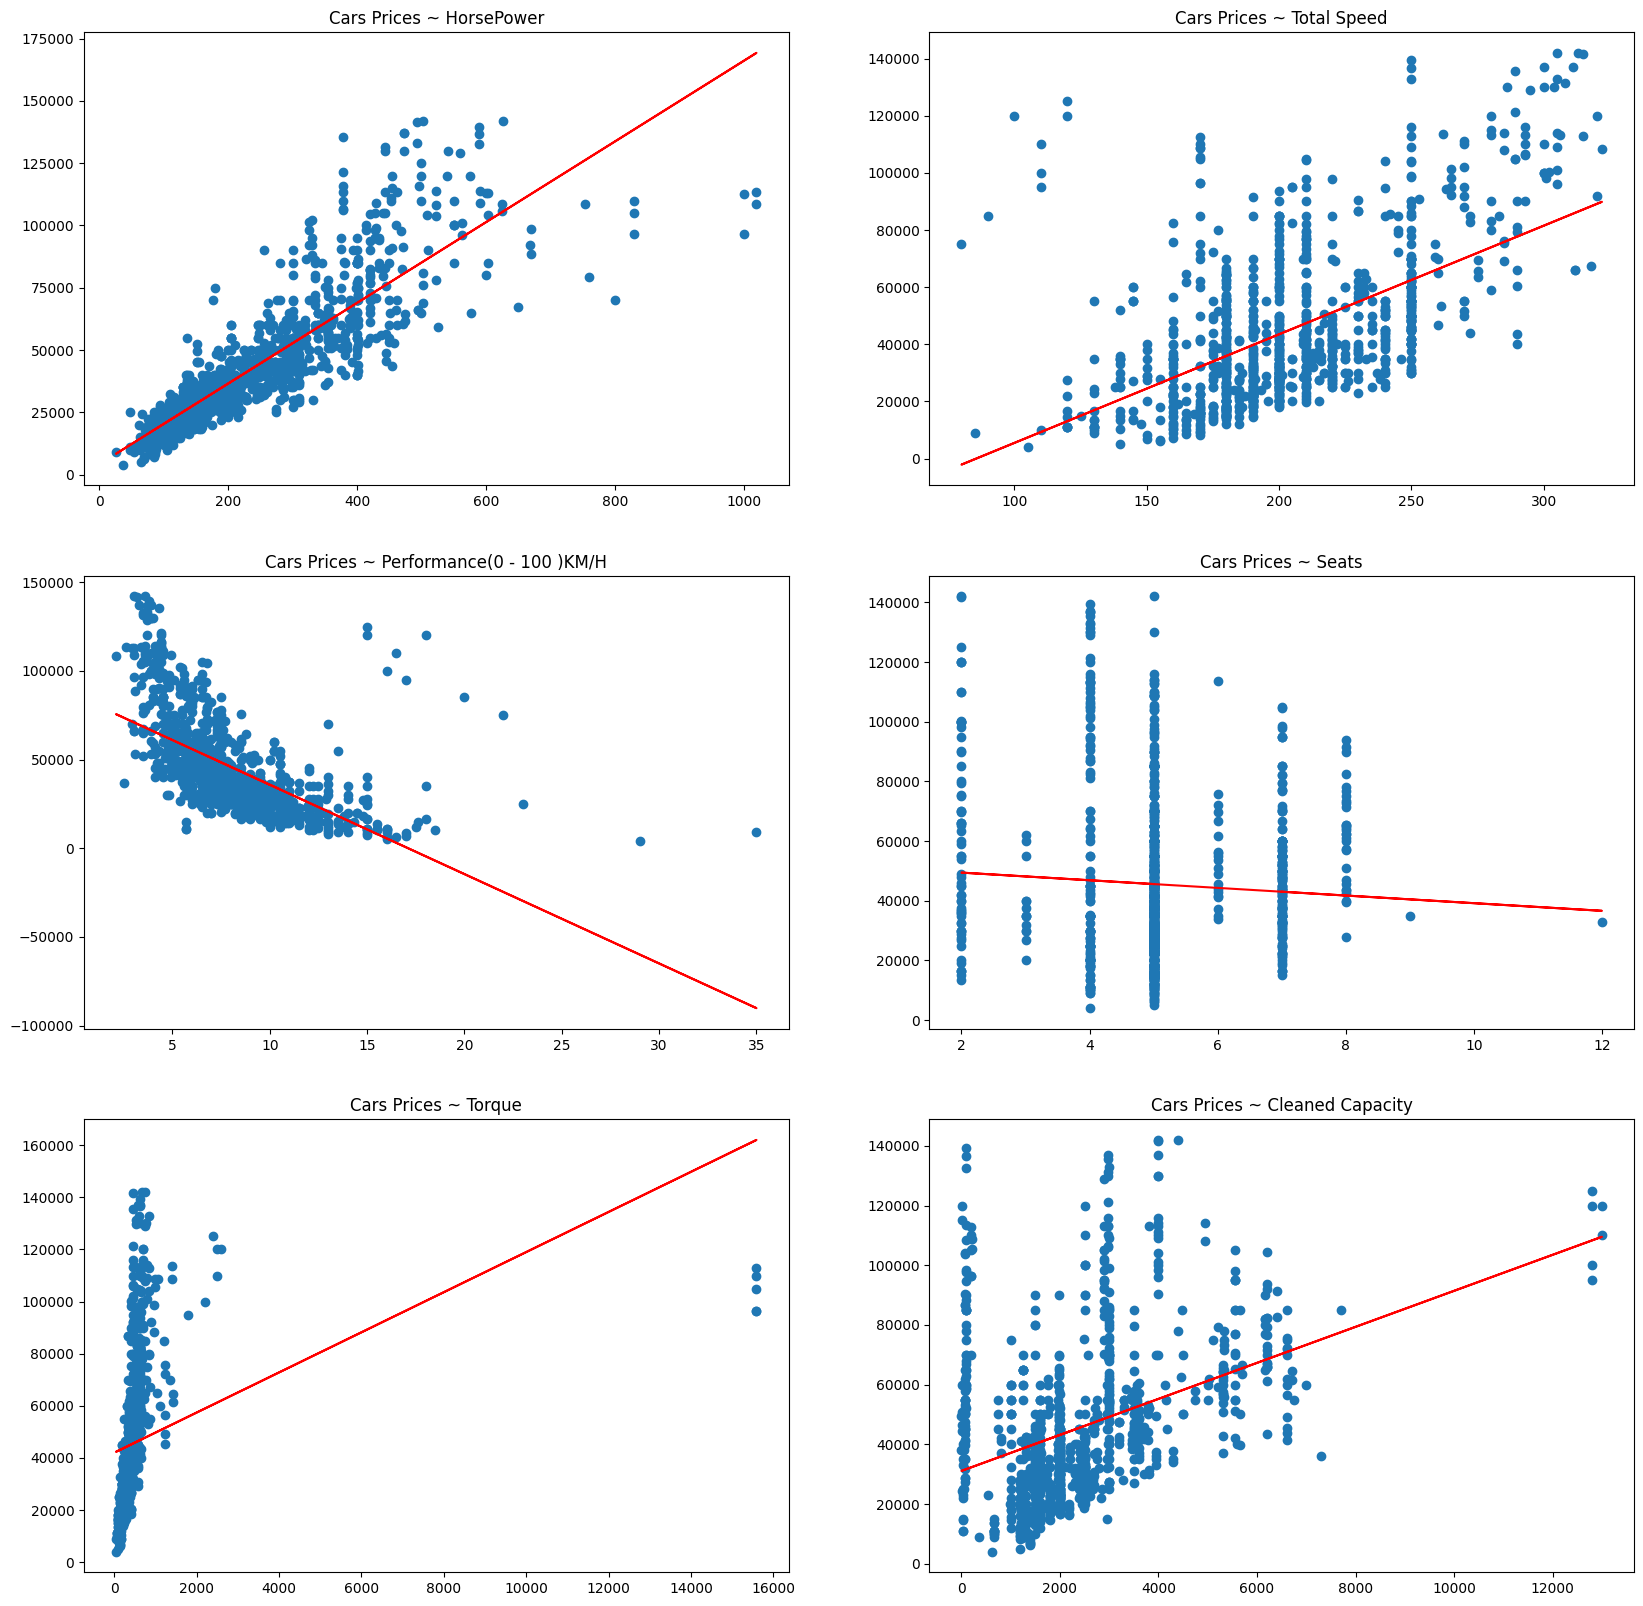

In [21]:
plt.figure(figsize=(20,20))

plot_col = num_col
plot_col.remove('Cars Prices')
for index,col in enumerate(plot_col):
    slope, intercept = np.polyfit(df[col], df['Cars Prices'], deg=1)
    line = slope*df[col] + intercept

    plt.subplot(3,2,index+1)
    plt.plot(df[col], line, color='red')
    plt.scatter(df[col], df['Cars Prices'])
    plt.title(f"Cars Prices ~ {col}")
plt.show()

In [22]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Cleaned Capacity
0,Ford,KA+,1.2L Petrol,"1,200 cc",77.5,165.0,10.5,13500.0,Petrol,5,120.0,1200.0
1,TOYOTA,GR SUPRA,I4,"2,998 cc",382.0,250.0,4.1,53900.0,Petrol,2,500.0,2998.0
2,TOYOTA,TOYOTA 86,BOXER-4,"1,998 cc",205.0,226.0,6.4,27000.0,Petrol,2,205.0,1998.0
3,TOYOTA,TOYOTA GR86,BOXER-4,"2,387 cc",228.0,226.0,5.6,30000.0,Petrol,4,250.0,2387.0
4,TOYOTA,TOYOTA LAND CRUISER,V8,"5,663 cc",381.0,220.0,6.7,85000.0,Diesel,7,500.0,5663.0


In [23]:
df.Engines.nunique()

330

In [24]:
df['Cars Names'].nunique()

1048

In [25]:
df['Company Names'].nunique()

31

In [26]:
df['Fuel Types'].nunique()

17

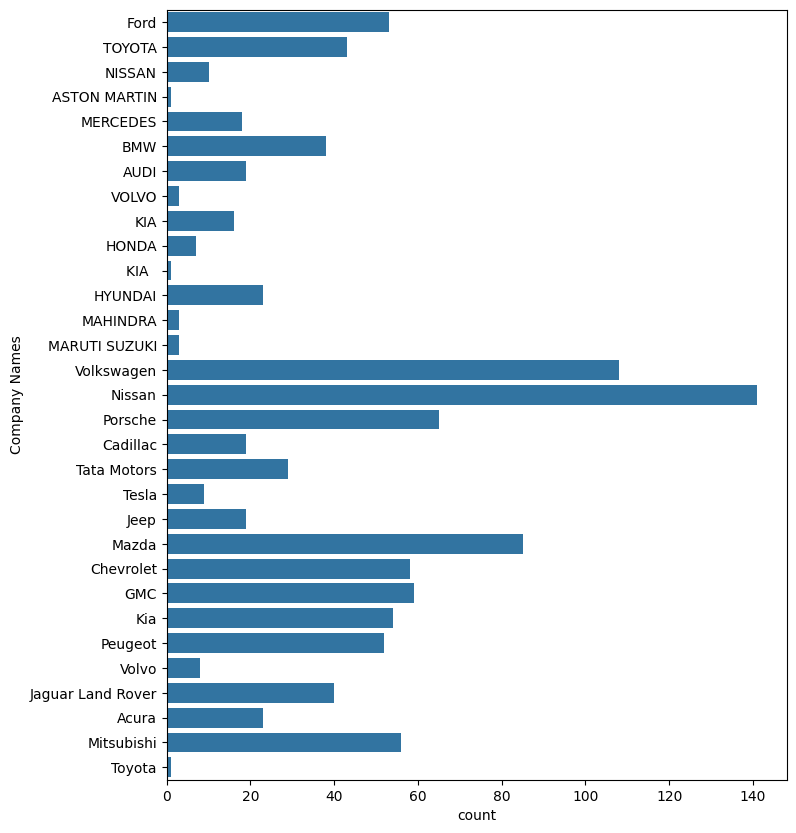

In [27]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, y='Company Names')
plt.show()

In [28]:
df['Company Names'] = df['Company Names'].str.strip().str.upper()

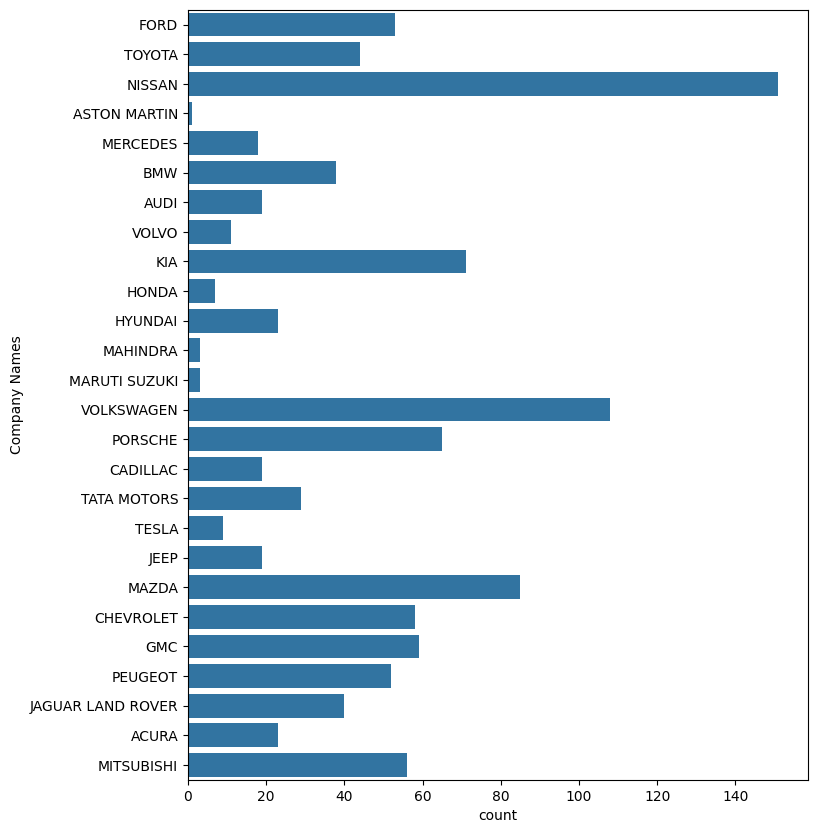

In [29]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, y='Company Names')
plt.show()

In [30]:
df['Company Names'].nunique()

26

In [31]:
company_names = df['Company Names'].unique().tolist()

In [32]:
df.duplicated().sum()

np.int64(5)

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
# Encode all categorical columns using LabelEncoder (convert text values to numeric codes)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [35]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Cleaned Capacity
0,6,514,26,6,77.5,165.0,10.5,13500.0,9,5,120.0,1200.0
1,23,379,292,138,382.0,250.0,4.1,53900.0,9,2,500.0,2998.0
2,23,890,271,45,205.0,226.0,6.4,27000.0,9,2,205.0,1998.0
3,23,889,271,120,228.0,226.0,5.6,30000.0,9,4,250.0,2387.0
4,23,891,327,229,381.0,220.0,6.7,85000.0,1,7,500.0,5663.0


In [36]:
df.shape

(1059, 12)

In [37]:
# Drop the 'CC/Battery Capacity' column from the DataFrame
df.drop('CC/Battery Capacity',axis=1,inplace=True)

In [38]:
df.shape

(1059, 11)

In [39]:
## Scale all numeric columns so they have mean=0 and standard deviation=1 (normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in num_col:
    df[col] = scaler.fit_transform(df[[col]])

In [40]:
df[num_col]

,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Seats,Torque,Cleaned Capacity
0,-1.272394,-1.027340,0.771547,-0.049777,-0.316733,-0.707054
1,0.899068,1.131952,-1.260527,-2.410117,0.038052,0.357310
2,-0.363161,0.522270,-0.530250,-2.410117,-0.237373,-0.234661
3,-0.199143,0.522270,-0.784260,-0.836557,-0.195359,-0.004384
4,0.891936,0.369849,-0.434997,1.523783,0.038052,1.934913
...,...,...,...,...,...,...
1061,-0.969316,-1.916460,2.200349,-2.410117,-0.288724,-0.234661
1062,-0.898004,-1.408392,2.041593,-2.410117,-0.279387,-0.643121
1063,-0.862348,-0.773306,1.247814,-0.836557,-0.260714,-0.643121
1064,-0.398817,0.369849,-0.022232,-0.049777,-0.195359,0.062509


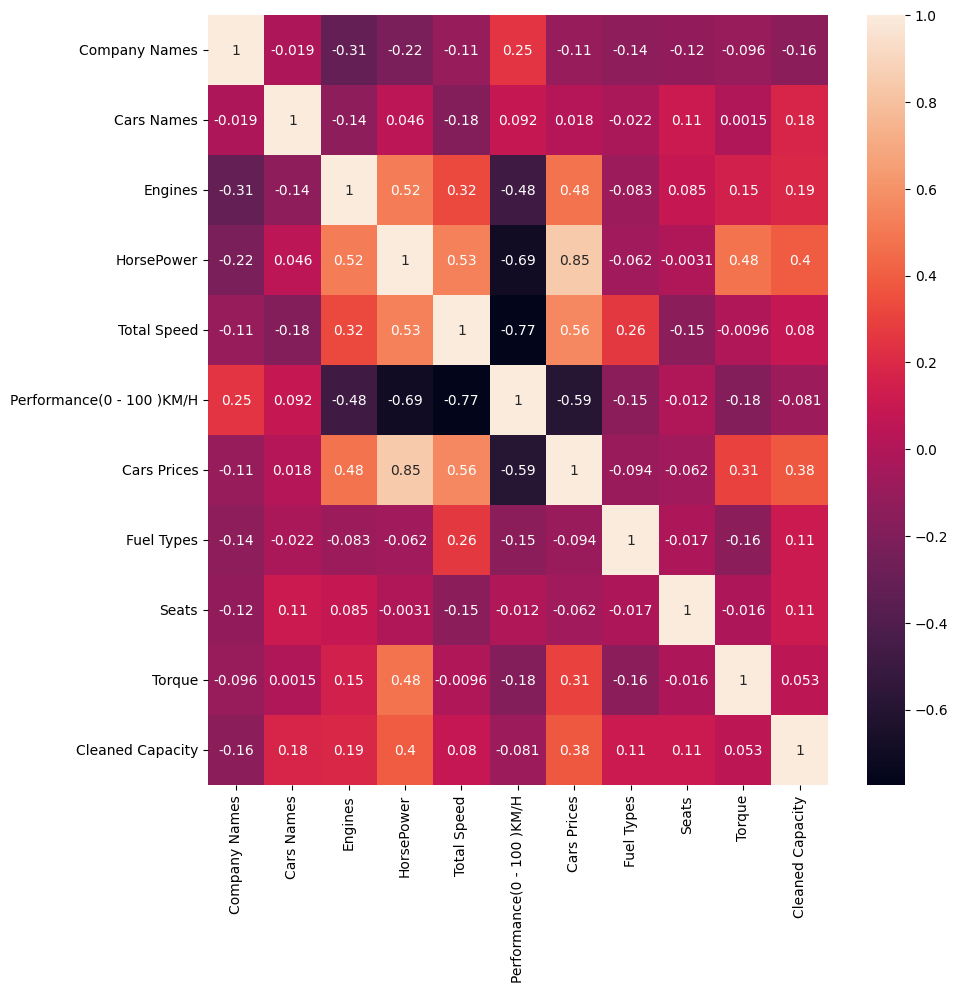

In [41]:
corr_mat = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [42]:
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
Cleaned Capacity             0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(1059, 11)

In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.head(10)

,Company Names,Cars Names,Engines,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Cleaned Capacity
0,6,514,26,-1.272394,-1.027340,0.771547,13500.0,9,-0.049777,-0.316733,-0.707054
1,23,379,292,0.899068,1.131952,-1.260527,53900.0,9,-2.410117,0.038052,0.357310
2,23,890,271,-0.363161,0.522270,-0.530250,27000.0,9,-2.410117,-0.237373,-0.234661
3,23,889,271,-0.199143,0.522270,-0.784260,30000.0,9,-0.836557,-0.195359,-0.004384
4,23,891,327,0.891936,0.369849,-0.434997,85000.0,1,1.523783,0.038052,1.934913
5,23,892,327,0.891936,-0.138220,-0.371495,50000.0,9,1.523783,0.179032,1.934913
6,18,381,320,2.453677,2.783176,-1.641541,113000.0,9,-0.836557,0.165961,0.831479
7,18,61,320,0.542506,1.131952,-1.070020,30000.0,9,-2.410117,-0.087056,0.770506
8,18,1039,320,1.027430,2.148090,-1.260527,40000.0,9,-2.410117,0.014711,0.357310
9,18,113,292,-0.484392,0.496866,-0.244490,25000.0,9,-0.049777,-0.073985,0.055405


In [48]:
X = df.drop('Cars Prices', axis=1)
y = df['Cars Prices']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
model = RandomForestRegressor(n_estimators=100,random_state=42, max_depth=4)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
model.score(X_train, y_train) * 100

88.42814464148569

In [53]:
model.score(X_test, y_test) * 100

82.0247196062052

In [54]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state=42, max_depth=8)
DT.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
DT.score(X_train, y_train) * 100

95.4008725908249

In [56]:
DT.score(X_test, y_test) * 100

61.99547138368533

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=42,n_estimators=12)
GBR.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,12
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [58]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train , y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
GBR.score(X_train,y_train) * 100

78.08709610009845

In [60]:
GBR.score(X_test,y_test) * 100

76.58131455578854

# Best model Gradient Boosting Regressor:
## train accracy = 88.35%
## test accuracy = 94.98%

In [61]:
import joblib

joblib.dump(GBR, "best_car_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [62]:
#test model for real data 

y_pred = model.predict([[1,892,327,0.891936,-0.138220,-0.371495,9,1.523783,0.179032,1.934913]])
print( y_pred[0])


64575.62778299266


c:\Users\Badr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
